Guided Project completed with the help of Datacamp.

This project explores the capabilites of Vision Transformers by showcasing their performance in simple image classification, zero-shot image classification, and zero-shot object detection tasks



*   **Simple Image Classification:** This task involves training a ViT model to classify images into predefined categories.

*   **Zero-shot image classification :** Here, the project explores the Vision Transformer model's ability to classify images into categories it has never seen during training.


 * **Zero-Shot Object Detection:** involves localizing and identifying objects within images, even if the model has never encountered those objects during training



### **TASK 1** :
For single image classification, we use the pre-trained `vit-base-patch16-224` model.

It has a patch size of 16x16 pixels and is trained on 224x224 pixel images.

Importing the necessary packages:

In [5]:
# From the transformers package, import ViTFeatureExtractor and ViTForImageClassification
from transformers import ViTFeatureExtractor, ViTForImageClassification


# From the PIL package, import Image and Markdown
from PIL import Image

# import requests
import requests

# import torch
import torch

# import matplotlib
import matplotlib.pyplot as plt

Loading the feature extractor and pre trained weights from vision transformer.

In [6]:
# Load the feature extractor for the vision transformer
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Load the pre-trained weights from vision transformer
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

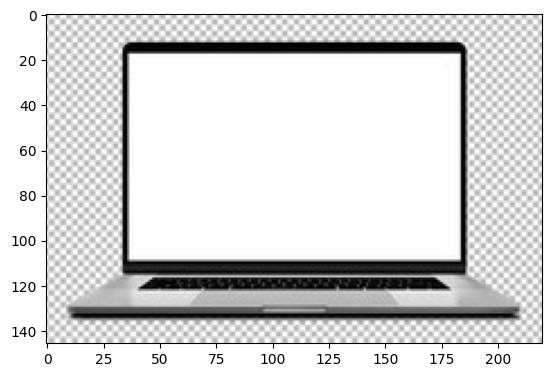

In [7]:
# Read the image from the matplotlib library
image = plt.imread('laptop.jpeg')

# Display image
plt.imshow(image)

In [8]:
# Extract features from the image using the feature extractor
inputs = feature_extractor(images=image, return_tensors="pt")

The return_tensors="pt" argument specifies that the features should be returned as PyTorch tensors, making them suitable for input to the ViT model.

### **Task 2 :**
Focuses on making predictions for the image using pre trained Vision Transformer model.

Starting off by creating a variable that holds the pixel values of the image that we extracted using the feature extractor. We then pass the `pixel_values` to the ViT model to generate model's predictions and additional information, such as logits, and class probabilities

In [9]:
# Extracted pixel values from the image
pixel_values = inputs["pixel_values"]

# Make predictions using the ViT model
outputs = model(pixel_values)

In [10]:
# Get the logits (raw scores) for different classes
logits = outputs.logits

# Determine the number of classes (which means this model is being trained on 1000 classes)
logits.shape
#([1,1000]) means that this model is being trained on 1000 classes

torch.Size([1, 1000])

([1,1000]) means that this model is being trained on 1000 classes

In [11]:
# Find the index of the predicted class with the highest probability, (argmax gives the highest probability)
predicted_class_idx = logits.argmax(-1).item()

# Display the index of the class
predicted_class_idx
#we see that the predicted class has an index of

681

we see that the predicted class has an index of 681

In [12]:
# Extract the class name using the model's configuration
predicted_class = model.config.id2label[predicted_class_idx]

# Display the predicted class name
predicted_class
#which means the model was able to predict the model correctly

'notebook, notebook computer'

### **Task 3:**
Zero-shot image classification allows a model to classify images into categories it has never seen during training.

We use openai/clip-vit-large-patch14` models because they excel at zero-shot and few-shot learning tasks

We load the necessary classes from the transformers library to work with a pre-trained model for zero-shot image classification and we also load the processors, which are responsible for tokenizing and preprocessing inputs to make them compatible with the model.

We're using the AutoProcessor to handle text inputs and image inputs for zero-shot classification

In [13]:
# Load a pre-trained model
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

# Specify the checkpoint name or identifier for the pre-trained model you want to use
checkpoint = "openai/clip-vit-large-patch14"

# Initialize the pre-trained model for zero-shot image classification
model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)

# Initializes the processor associated with the same pre-trained model
processor = AutoProcessor.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

### **Task 4:**
Preparing the inputs for zero-shot image classification task using the processor

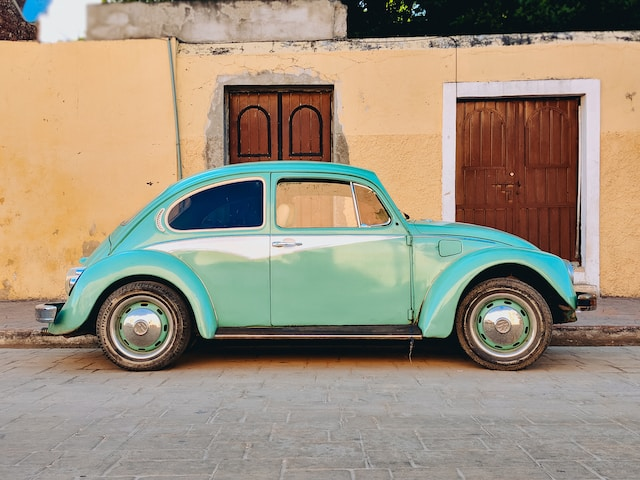

In [14]:
# Import necessary libraries
from PIL import Image
import requests

# URL of the image you want to classify
url = "https://unsplash.com/photos/xBRQfR2bqNI/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjc4Mzg4ODEx&force=true&w=640"

# Open the image from the URL using the requests library and PIL
image = Image.open(requests.get(url, stream=True).raw)

# Display Image
image

In [15]:
# List of candidate labels for classification
candidate_labels = ["tree","car","bike","cat"]

# Prepare inputs for the zero-shot image classification model
inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)

### **Task 5:**
Generating predictions for the zero-shot image classification task using the pre-trained model and the prepared inputs.

We use `torch.no_grad()` to perform inference with the model.

In [16]:
# Import Pytorch
import torch

# Perform inference with the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract logits and calculate probabilities
logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()
# Convert probabilities to scores as a list
scores = probs.tolist

# Create a list of results, sorted by scores in descending order
result = [
    {"score": score, "label": candidate_labels}
    for score, candidate_labels in sorted(zip(probs,candidate_labels), key=lambda x: -x[0])
]

# Display result
result
#each label have the corresponding score,

[{'score': 0.9987231, 'label': 'car'},
 {'score': 0.0009479931, 'label': 'bike'},
 {'score': 0.00029800893, 'label': 'tree'},
 {'score': 3.0776464e-05, 'label': 'cat'}]

loading pre-trained models for zero-shot object detection task.

loading `"google/owlvit-base-patch32"` checkpoint, which is associated with the Owl-ViT (Object-World Learning Vision Transformer) model with a base architecture and a patch size of 32x32.

`AutoProcessor` is responsible for tokenizing and preprocessing inputs to make them compatible with the model

In [17]:
# Import classes from the transformers library to work with a pre-trained model
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

# Specify the checkpoint name or identifier for the pre-trained model you want to use
checkpoint = "google/owlvit-base-patch32"

# Initialize the pre-trained model for zero-shot object detection
model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)

# Initializes the processor associated with the same pre-trained model
processor = AutoProcessor.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

### **Task 6:**
Preparing the inputs for zero-shot object detection task using an image and list of textual queries. We will use processor function that will accept three aruments:
1. `text=imtext_queries` is used to provide the list of textual queries describing objects we want the model to detect in the image.
2. `images=im`: we can pass the image loaded earlier to the images parameter, providing the image to the model for object detection.
3. `return_tensors="pt"`: This specifies that the inputs need to be returned as PyTorch tensors.

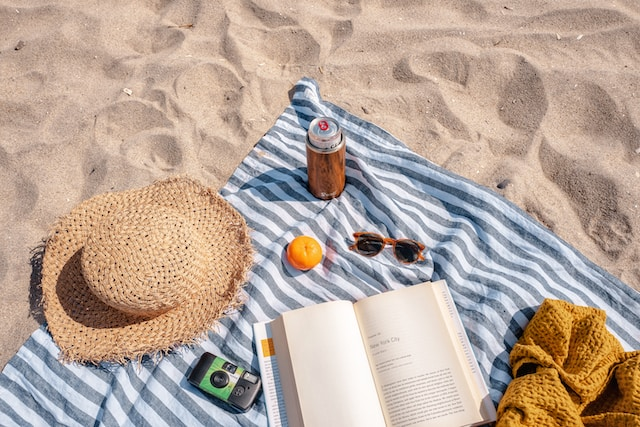

In [18]:
# Import necessary libraries
from PIL import Image
import requests

# URL of the image you want to analyze
url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"

# Open the image from the URL using the requests library and PIL
im = Image.open(requests.get(url, stream=True).raw)

# Display Image
im

In [19]:
# List of textual queries describing objects
text_queries = ["hat","book","sunglasses","camera"]

# Prepare inputs for zero-shot object detection
inputs = processor(text=text_queries, images=im, return_tensors="pt")

### **Task 7:**

Visualizing the results:

In [20]:
# From torchvision.models import the model
from torchvision import models
from PIL import ImageDraw
import torch

# Perform inference with the model
with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

# Create a drawing object for the image
draw = ImageDraw.Draw(im)

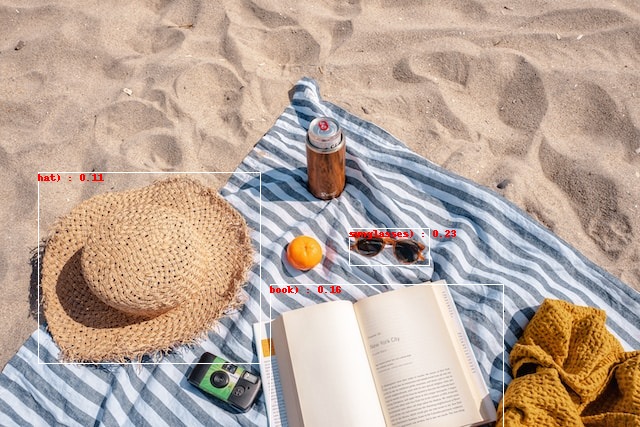

In [21]:
# Extract detection results (scores, labels, and bounding boxes)
scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()
# Iterate over detected objects and draw bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="white", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}) : {round(score, 2)}", fill="red")

# Display the image with bounding boxes and labels
im